<a href="https://colab.research.google.com/github/shahidurrahmands/Data-Science/blob/main/Classifying_The_Credit_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: Classifying The Credit Scores**

Problem Statement:
As a data scientist in a global finance company, your objective is to develop a machine learning model that predicts individuals' credit scores based on their financial and credit- related information. The company aims to automate and enhance the credit scoring process using intelligent systems.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


- Highlight the features, including income, outstanding debt, credit history, etc.
- Identify the target variable: `Credit_Score`.

In [ ]:
df = pd.read_csv('/content/sample_data/Bank_Data.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


**2. Data Exploration and Preprocessing:**
- Conduct exploratory data analysis (EDA) to understand the distribution of features and
the target variable.
- Handle any missing values, outliers, or data inconsistencies.
- Encode categorical variables if necessary.
- Explore the distribution of the target variable.

In [ ]:
features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
            'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
            'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly']
target_variable = 'Credit_Mix'

if target_variable not in df.columns:
    print(f"Warning: Target variable '{target_variable}' not found in data")

print("Features:")
print(df[features].describe())



if target_variable in df.columns:
    print(f"\nTarget Variable: {target_variable}")
    print(df.groupby('Credit_Mix').describe())



Features:
       Monthly_Inhand_Salary  Num_Bank_Accounts  Credit_Utilization_Ratio  \
count           20283.000000       23913.000000              23913.000000   
mean             4217.473841          16.745118                 32.275349   
std              3208.483345         114.742259                  5.088243   
min               319.556250          -1.000000                 20.509652   
25%              1632.145833           3.000000                 28.093262   
50%              3099.872500           6.000000                 32.243890   
75%              5982.876667           7.000000                 36.445510   
max             15136.696667        1798.000000                 48.540663   

       Total_EMI_per_month  
count         23913.000000  
mean           1480.109881  
std            8570.511705  
min               0.000000  
25%              33.259454  
50%              75.496032  
75%             177.172430  
max           82347.000000  

Target Variable: Credit_Mix
      

**3. Model Selection:**
- Choose suitable machine learning classification models for predicting credit scores.
Suggested models include:
- Logistic Regression
- Random Forest Classifier
- Support Vector Machine (SVM)
- Gradient Boosting Classifier (e.g., XGBoost)

Credit_Mix
Bad         4599
Good        5912
Standard    8621
_           4781
dtype: int64
Credit_Mix
Bad          6192
Good         7505
Standard    10216
dtype: int64
Missing values:
ID                             0
Customer_ID                    0
Month                          0
Name                        1977
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       2936
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                2179
Delay_from_due_date            0
Num_of_Delayed_Payment      1391
Changed_Credit_Limit           0
Num_Credit_Inquiries         397
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1696
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      868
Payment_Behaviour     

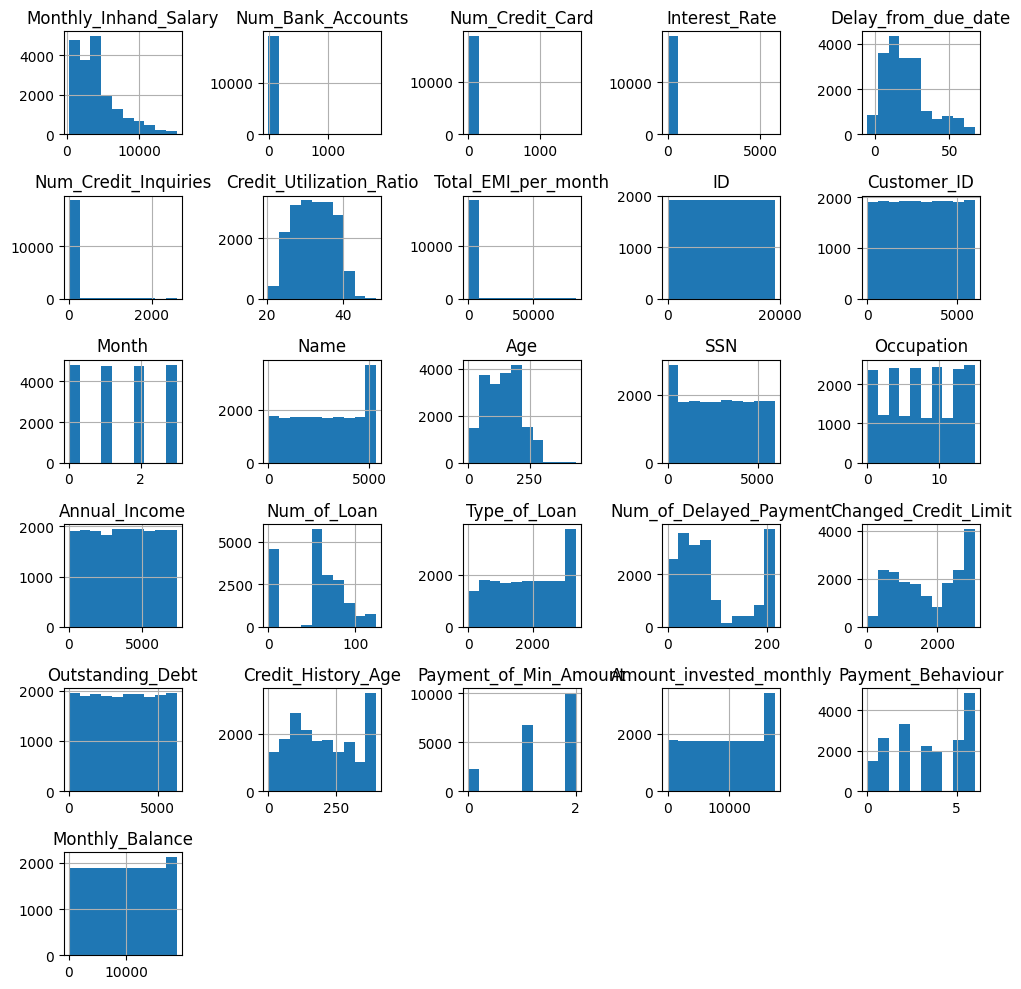

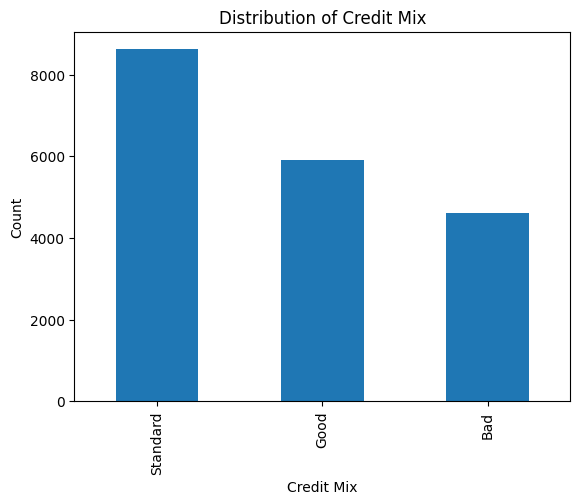

Further exploration might be needed for outliers and data inconsistencies.


In [ ]:
# Calculate the grouped sum of 'Credit_Mix' values and update the counts
grouped_sum_credit_mix = df.groupby('Credit_Mix').size()
print(grouped_sum_credit_mix)

underscore_count = grouped_sum_credit_mix['_']
distribute_count = underscore_count // 3
grouped_sum_credit_mix['Good'] += distribute_count
grouped_sum_credit_mix['Bad'] += distribute_count
grouped_sum_credit_mix['Standard'] += distribute_count
grouped_sum_credit_mix['Standard'] += underscore_count % 3
grouped_sum_credit_mix['_'] = 0

# Remove rows where 'Credit_Mix' is equal to '_'
df_filtered = df[df['Credit_Mix'] != '_']

# Filter out the '_' values with count 0
grouped_sum_credit_mix_filtered = grouped_sum_credit_mix[grouped_sum_credit_mix != 0]
print(grouped_sum_credit_mix_filtered)

features = df_filtered.drop(target_variable, axis=1)

print("Missing values:")
print(features.isnull().sum())

# Separate numerical and categorical features
numerical_features = features.select_dtypes(include=['float64', 'int64'])
categorical_features = features.select_dtypes(include=['object'])

# Impute missing values for numerical features
imputer = SimpleImputer(strategy='mean')
numerical_features = pd.DataFrame(imputer.fit_transform(numerical_features), columns=numerical_features.columns)

# Encode categorical features using label encoding
le = LabelEncoder()
for col in categorical_features.columns:
    categorical_features[col] = le.fit_transform(categorical_features[col])

# Concatenate numerical and categorical features back together
features = pd.concat([numerical_features, categorical_features], axis=1)

# Explore feature distributions with histograms
features.hist(figsize=(10, 10))
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Distribution of Features')
plt.tight_layout()
plt.show()

# Explore target variable distribution
df_filtered[target_variable].value_counts().plot(kind='bar')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.title('Distribution of Credit Mix')
plt.show()

print("Further exploration might be needed for outliers and data inconsistencies.")


**4. Model Training:**
- Train each selected model using the training dataset.
- Utilize evaluation metrics suitable for classification tasks, such as accuracy, precision,
recall, F1 score, and confusion matrix.

In [ ]:
df_filtered = df[df['Credit_Mix'] != '_']

# Separate features and target variable
X = df_filtered.drop(columns=['Credit_Mix'])
y = df_filtered['Credit_Mix']

# Label encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Impute missing values for numerical features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine training and testing data for label encoding
combined_data = pd.concat([X_train, X_test])

# Encode categorical features using LabelEncoder fitted on combined data
for col in combined_data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    combined_data[col] = label_encoders[col].fit_transform(combined_data[col])

# Split the combined data back into training and testing sets
X_train = combined_data[:len(X_train)]
X_test = combined_data[len(X_train):]

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

**5. Hyperparameter Tuning:**
- Conduct hyperparameter tuning for at least one model using methods like Grid Search
or Random Search.
- Explain the chosen hyperparameters and the reasoning behind them.

In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"Accuracy of {model_name}: {accuracy:.2f}")
    print(f"Precision of {model_name}: {precision:.2f}")
    print(f"Recall of {model_name}: {recall:.2f}")
    print(f"F1 Score of {model_name}: {f1:.2f}")
    print(f"Confusion Matrix of {model_name}:\n{confusion_mat}")
    print("-" * 50)

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.55
Precision of Logistic Regression: 0.56
Recall of Logistic Regression: 0.55
F1 Score of Logistic Regression: 0.55
Confusion Matrix of Logistic Regression:
[[ 436   65  467]
 [  56  605  522]
 [ 205  416 1055]]
--------------------------------------------------
Training Random Forest Classifier...
Accuracy of Random Forest Classifier: 0.97
Precision of Random Forest Classifier: 0.97
Recall of Random Forest Classifier: 0.97
F1 Score of Random Forest Classifier: 0.97
Confusion Matrix of Random Forest Classifier:
[[ 946    0   22]
 [   0 1159   24]
 [  27   40 1609]]
--------------------------------------------------
Training Support Vector Machine...
Accuracy of Support Vector Machine: 0.52
Precision of Support Vector Machine: 0.56
Recall of Support Vector Machine: 0.52
F1 Score of Support Vector Machine: 0.48
Confusion Matrix of Support Vector Machine:
[[ 373    1  594]
 [  95  254  834]
 [ 180  132 1364]]
---------------------------------------------

**6. Model Evaluation:**
- Assess the performance of each model on the testing set.
- Discuss the strengths and limitations of each model in the context of credit score
classification.

In [ ]:
# Define the Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with best parameters on the testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9657628226069912
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

         Bad       0.98      0.97      0.97       968
        Good       0.97      0.99      0.98      1183
    Standard       0.97      0.96      0.97      1676

    accuracy                           0.97      3827
   macro avg       0.97      0.97      0.97      3827
weighted avg       0.97      0.97      0.97      3827



**7. Interpretability:**
- If applicable, explore methods to interpret the model's decisions and understand the
factors influencing credit score classifications.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a dictionary to store evaluation metrics for each model
evaluation_results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    # Store evaluation results in the dictionary
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion
    }

    # Display evaluation metrics for the model
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{confusion}")
    print("-" * 50)

# Discussion of Strengths
for model_name, results in evaluation_results.items():
    print(f"Strengths of {model_name}:")
    # Discuss the strengths of the model based on the evaluation metrics
    # For example, if a model has high accuracy and precision, it may be good at correctly classifying instances and minimizing false positives.


Evaluating Logistic Regression...
Accuracy: 0.55
Precision: 0.56
Recall: 0.55
F1 Score: 0.55
Confusion Matrix:
[[ 436   65  467]
 [  56  605  522]
 [ 205  416 1055]]
--------------------------------------------------
Evaluating Random Forest Classifier...
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion Matrix:
[[ 946    0   22]
 [   0 1159   24]
 [  27   40 1609]]
--------------------------------------------------
Evaluating Support Vector Machine...
Accuracy: 0.52
Precision: 0.56
Recall: 0.52
F1 Score: 0.48
Confusion Matrix:
[[ 373    1  594]
 [  95  254  834]
 [ 180  132 1364]]
--------------------------------------------------
Evaluating Gradient Boosting Classifier...
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Confusion Matrix:
[[ 917    0   51]
 [   0 1133   50]
 [  48   80 1548]]
--------------------------------------------------
Strengths of Logistic Regression:
Strengths of Random Forest Classifier:
Strengths of Support Vector Machine:
Stren